# Linear Classification

In [40]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [41]:
# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [42]:
# Get the dataset
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, transform=transforms.ToTensor()
)

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

## Visualize the data

In [43]:
# get a mini-batch of training samples
x, y = list(iter(train_loader))[0]

In [44]:
# check the size of mini-batch
x.shape, y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

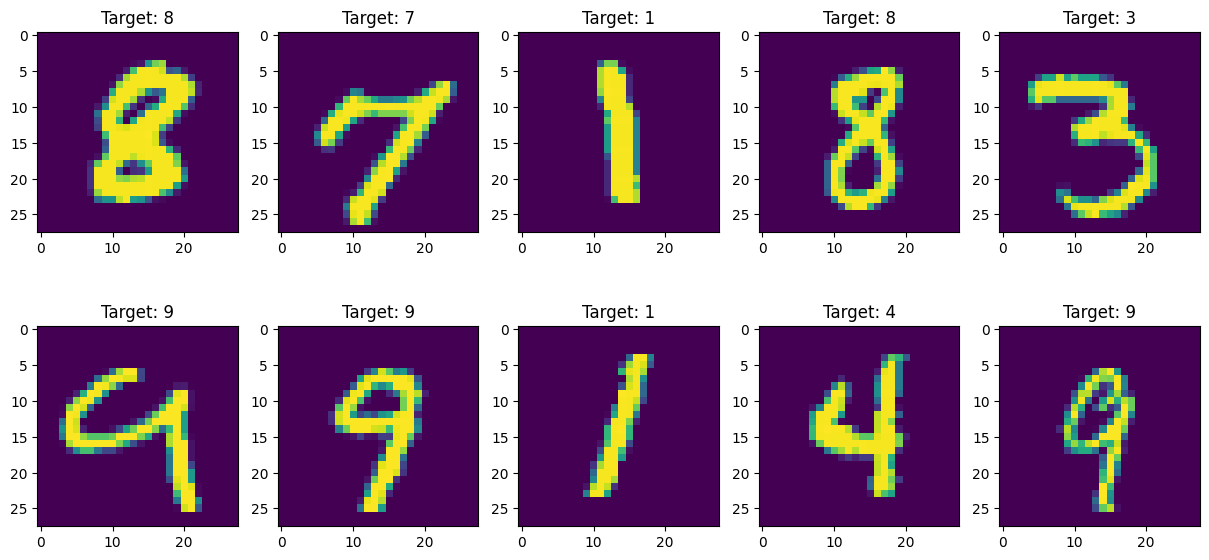

In [45]:
# plot a few samples
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x[i * 5 + j, 0, :, :])
        ax[i, j].set_title("Target: {}".format(y[i * 5 + j]))

## Build a logistic regression model

In [46]:
# Logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

In [47]:
model = LogisticRegression(input_size, num_classes)

# check the parameters of the linear model
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[-0.0148, -0.0273, -0.0082,  ..., -0.0247, -0.0275,  0.0106],
        [ 0.0068,  0.0198, -0.0033,  ..., -0.0114, -0.0266,  0.0180],
        [ 0.0260,  0.0023, -0.0312,  ...,  0.0098, -0.0176, -0.0179],
        ...,
        [-0.0016, -0.0120,  0.0346,  ...,  0.0154, -0.0160,  0.0139],
        [ 0.0089,  0.0287,  0.0207,  ..., -0.0043, -0.0053, -0.0050],
        [ 0.0310,  0.0198,  0.0225,  ..., -0.0087, -0.0183,  0.0284]],
       requires_grad=True)
linear.bias Parameter containing:
tensor([ 0.0016, -0.0062,  0.0007, -0.0158,  0.0328, -0.0014,  0.0176,  0.0104,
        -0.0259,  0.0243], requires_grad=True)


In [48]:
# Loss Function
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()

# Optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28 * 28)

        # Forward pass
        outputs = model.forward(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, num_epochs, i + 1, total_step, loss.item()
                )
            )

Epoch [1/5], Step [100/600], Loss: 2.2286
Epoch [1/5], Step [200/600], Loss: 2.1383
Epoch [1/5], Step [300/600], Loss: 2.0543
Epoch [1/5], Step [400/600], Loss: 1.9781
Epoch [1/5], Step [500/600], Loss: 1.8351
Epoch [1/5], Step [600/600], Loss: 1.8368
Epoch [2/5], Step [100/600], Loss: 1.7326
Epoch [2/5], Step [200/600], Loss: 1.7321
Epoch [2/5], Step [300/600], Loss: 1.6758
Epoch [2/5], Step [400/600], Loss: 1.5663
Epoch [2/5], Step [500/600], Loss: 1.5118
Epoch [2/5], Step [600/600], Loss: 1.5171
Epoch [3/5], Step [100/600], Loss: 1.3856
Epoch [3/5], Step [200/600], Loss: 1.3995
Epoch [3/5], Step [300/600], Loss: 1.3017
Epoch [3/5], Step [400/600], Loss: 1.2882
Epoch [3/5], Step [500/600], Loss: 1.2983
Epoch [3/5], Step [600/600], Loss: 1.2199
Epoch [4/5], Step [100/600], Loss: 1.2970
Epoch [4/5], Step [200/600], Loss: 1.2665
Epoch [4/5], Step [300/600], Loss: 1.1940
Epoch [4/5], Step [400/600], Loss: 1.1462
Epoch [4/5], Step [500/600], Loss: 1.1371
Epoch [4/5], Step [600/600], Loss:

In [50]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print(
        "Accuracy of the model on the 10000 test images: {} %".format(
            100 * correct / total
        )
    )

# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")

Accuracy of the model on the 10000 test images: 83.01000213623047 %
